# Transfer QAOA params between graphs


In [1]:
import qtensor
import networkx as nx
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline
__plot_height = 2.719
matplotlib.rcParams['figure.figsize'] = (1.618*__plot_height, __plot_height)
set_matplotlib_formats('svg')

In [69]:
p = 6
gamma, beta = [.1]*p, [.3]*p

## Opitimize bethe lattice

In [70]:
B = qtensor.toolbox.bethe_graph(p=p, degree=3)

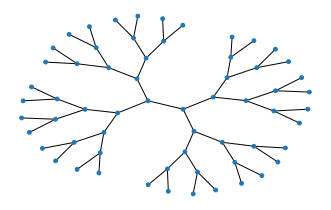

In [46]:
nx.draw_kamada_kawai(B, node_size=15)

In [75]:
from qtensor import parameter_optimization as popt
import torch

In [80]:
loss_history, params_history = popt.qaoa_maxcut_torch(B, gamma, beta,
                                                      edge=(0, 1),
                                                      Opt=torch.optim.Adam,
                                                      opt_kwargs=dict(lr=0.003),
                                                      steps=80)

Best solution: -0.6457629
Best params: [array([ 0.05839723,  0.11295886,  0.17518616,  0.01885968, -0.03931993,
        0.11860944], dtype=float32), array([0.2956671 , 0.32213166, 0.35021383, 0.235808  , 0.3010028 ,
       0.44573185], dtype=float32)]


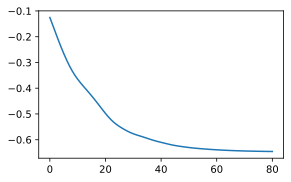

In [81]:
plt.plot(loss_history)
print('Best solution:', np.min(loss_history))
best_ix = np.argmin(loss_history)
best_params = params_history[best_ix]
print('Best params:', best_params)

In [82]:
estimate_cut = 1/2*(B.number_of_edges() - loss_history[best_ix]*B.number_of_edges())
approx_ratio = estimate_cut/B.number_of_edges()
print('Approx ratio:', approx_ratio)

Approx ratio: 0.8228814601898193


## Check the same parameters for random regular graph

Number of edges: 24


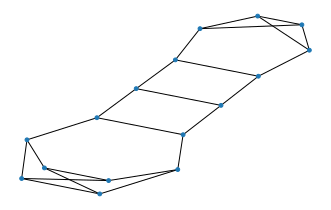

In [56]:
G = qtensor.toolbox.random_graph(nodes=16, degree=3, seed=10)
print('Number of edges:', G.number_of_edges())
nx.draw_kamada_kawai(G, node_size=15)

In [57]:
def maxcut_cost(G, gamma, beta):
    sim = qtensor.QAOAQtreeSimulator(qtensor.DefaultQAOAComposer)
    return sim.energy_expectation(G, gamma, beta)

In [58]:
maxcut_cost(G, *best_params)

array([19.01026102])

In [14]:
loss_history, param_history = popt.qaoa_maxcut_torch(G, gamma, beta, steps=20)

Best energy: 20.805624


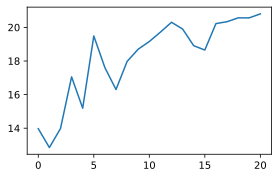

In [15]:
energies = - np.array(loss_history)
print('Best energy:', np.max(energies))
plt.plot(energies)